In [2]:
#Define your own path for data please.

img_path = './data/hotdog-nothotdog'

In [3]:
train = img_path + '/train/'
test = img_path + '/test/'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [6]:
img_width, img_height = 150, 150

train_data_dir = './data/hotdog-nothotdog/train/'
test_data_dir = './data/hotdog-nothotdog/test/'
nb_train_samples = 2000
nb_test_samples = 800
epochs = 50
batch_size = 16

In [7]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)



### Model 1

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

C:\Users\praha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,215,873 (42.79 MB)

 Trainable params: 11,215,873 (42.79 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 4242 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [12]:
# Fit!
hist = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)


Epoch 1/50


C:\Users\praha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.5283 - loss: 3.6611 - val_accuracy: 0.5250 - val_loss: 0.6991
Epoch 2/50
  2/125 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6250 - loss: 0.6215

C:\Users\praha\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.6327 - loss: 0.6501 - val_accuracy: 0.5575 - val_loss: 0.6917
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6295 - loss: 0.6052 - val_accuracy: 0.5100 - val_loss: 0.6987
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - accuracy: 0.6519 - loss: 0.6471 - val_accuracy: 0.5825 - val_loss: 0.7446
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.6488 - loss: 0.6156 - val_accuracy: 0.5075 - val_loss: 0.7224
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6223 - loss: 0.5942 - val_accuracy: 0.5200 - val_loss: 0.7744
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 138ms/step - accuracy: 0.6681 - loss: 0.6363 - val_accuracy: 0.5600 - val_loss: 0.6971
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.6908 - loss: 0.6264 - val_accuracy: 0.5725 - val_loss: 0.7584
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7078 - loss: 0.6053 - val_accur

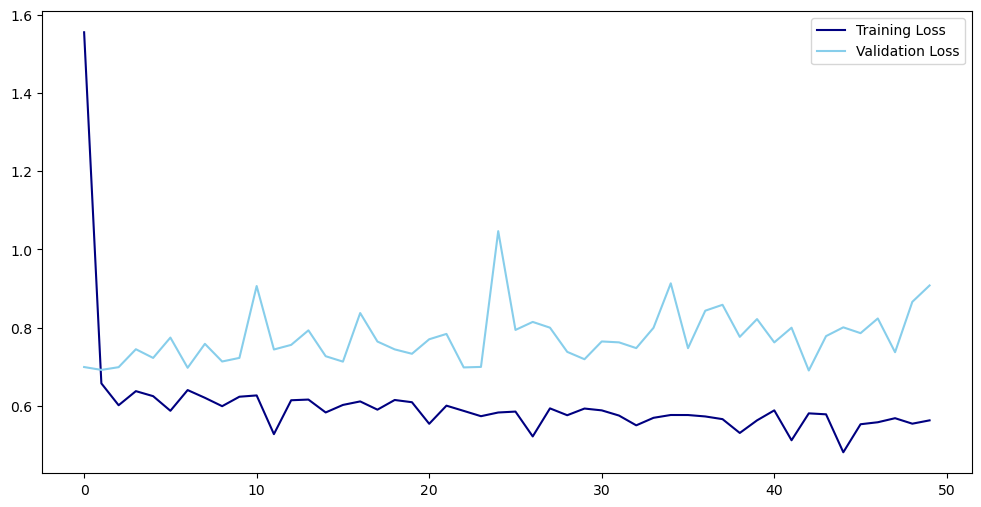

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], c='navy', label='Training Loss')
plt.plot(hist.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [14]:
model.save('./model/first_try.h5')

In [26]:
model.save_weights('model.weights.h5')

In [27]:
with open('modelarchitechture.pkl', 'wb') as f:
    pickle.dump(model.to_json(), f)

In [28]:
with open('modelarchitechture.pkl', 'rb') as f:
    architechture = pickle.load(f)

In [33]:
m = tf.keras.models.model_from_json(architechture)

In [34]:
m.load_weights('model.weights.h5')

### Model 2

In [38]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

C:\Users\praha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [39]:
model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
hist2 = model2.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.5014 - loss: 0.7102

C:\Users\praha\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


125/125 ━━━━━━━━━━━━━━━━━━━━ 56s 417ms/step - accuracy: 0.5016 - loss: 0.7101 - val_accuracy: 0.5400 - val_loss: 0.6622
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 405ms/step - accuracy: 0.6181 - loss: 0.6709 - val_accuracy: 0.5425 - val_loss: 0.7353
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6271 - loss: 0.5941 - val_accuracy: 0.5325 - val_loss: 0.7980
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 52s 405ms/step - accuracy: 0.6578 - loss: 0.6434 - val_accuracy: 0.5600 - val_loss: 0.7217
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 45s 359ms/step - accuracy: 0.6483 - loss: 0.6507 - val_accuracy: 0.5425 - val_loss: 0.6906
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.6976 - loss: 0.5854 - val_accuracy: 0.5425 - val_loss: 0.6890
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 415ms/step - accuracy: 0.6683 - loss: 0.6305 - val_accuracy: 0.5450 - val_loss: 0.7319
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 353ms/step - accuracy: 0.6796 - loss: 0.5965 - val_acc

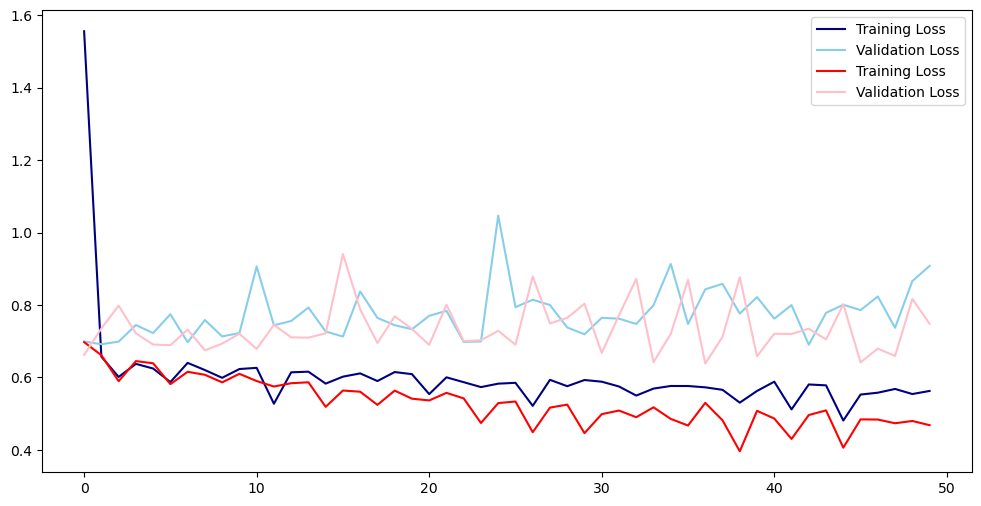

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], c='navy', label='Training Loss')
plt.plot(hist.history['val_loss'], c='skyblue', label='Validation Loss')
plt.plot(hist2.history['loss'], c='red', label='Training Loss')
plt.plot(hist2.history['val_loss'], c='pink', label='Validation Loss')
plt.legend();

In [43]:
model2.save('./model/refined_model.h5')

In [45]:
model2.save_weights('refined_model.weights.h5')

In [46]:
with open('model2architechture.pkl', 'wb') as f:
    pickle.dump(model.to_json(), f)

In [47]:
with open('model2architechture.pkl', 'rb') as f:
    architechture2 = pickle.load(f)

In [48]:
m2 = tf.keras.models.model_from_json(architechture2)

In [50]:
m2.load_weights('refined_model.weights.h5')